In [1]:
%load_ext autoreload
%autoreload 2

%cd /mnt/batch/tasks/shared/LS_root/mounts/clusters/ift6759/code/ift6759
from os import path
import os
import glob
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import netCDF4
import shutil
import matplotlib as mpl
import numpy as np

from climatenet.utils.data import ClimateDatasetLabeled, ClimateDataset, create_datasets
from climatenet.utils.metrics import currScore, get_iou_perClass
from climatenet.models import CGNet
from climatenet.utils.utils import Config
from climatenet.visualize_events import visualize_events

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ift6759/code/ift6759


## Train models

uncomment and run the line below if datasets have not been created yet

In [2]:
# create_datasets('data/curriculum/') # create dataset

In [3]:
if not os.path.exists('models_configs/analyze_predictions'):
    os.makedirs('models_configs/analyze_predictions')

In [4]:
with open('models_configs/CGNet.json', 'r') as json_file:
    config = json.load(json_file)

# curriculum with batch size 2
curr_config = config.copy()
curr_config["train_batch_size"] = 2
with open(f'models_configs/analyze_predictions/CGNet_curr_batchsize2.json', 'w') as f:
    f.write(json.dumps(curr_config, indent=4))

# og cgnet
baseline_config = config.copy()
baseline_config["train_batch_size"] = 4
with open(f'models_configs/analyze_predictions/CGNet_baseline.json', 'w') as f:
    f.write(json.dumps(baseline_config, indent=4))

In [5]:
train_path = "data/curriculum/"

In [6]:
print("training curriculum with batch size 2")
config = Config(f'models_configs/analyze_predictions/CGNet_curr_batchsize2.json')
cgnet_curriculum = CGNet(config)
cgnet_curriculum = CGNet(config, save_dir=f'results/CGNet_curr_batchsize2')
cgnet_curriculum.train(curriculum=True, train_data_path=train_path)
cgnet_curriculum.save_model('curriculum_learning_model')

training curriculum with batch size 2


  0%|          | 0/47 [00:00<?, ?it/s]

Starting simple training phase...
Epoch 1:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/47 [00:00<?, ?it/s]

IOUs:  [0.85076605 0.1054935  0.24254829] , mean:  0.39960261095966904
Val IOUs: [0.89910894 0.14947035 0.33550382] , mean: 0.4613610367640748
Epoch 2:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/47 [00:00<?, ?it/s]

IOUs:  [0.92748393 0.32768982 0.35328268] , mean:  0.5361521464534007
Val IOUs: [0.92119107 0.26872181 0.3648617 ] , mean: 0.5182581929194571
Epoch 3:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/80 [00:00<?, ?it/s]

IOUs:  [0.93160482 0.36310266 0.38767493] , mean:  0.5607941351115647
Val IOUs: [0.92684559 0.23138772 0.38325509] , mean: 0.5138294659666802
Starting medium training phase...
Epoch 1:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/80 [00:00<?, ?it/s]

IOUs:  [0.93301289 0.2838798  0.3739486 ] , mean:  0.5302804281221363
Val IOUs: [0.92160199 0.3209827  0.369999  ] , mean: 0.5375278975854928
Epoch 2:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/80 [00:00<?, ?it/s]

IOUs:  [0.93454288 0.33083919 0.38681182] , mean:  0.5507312941158389
Val IOUs: [0.92759298 0.33927581 0.38808983] , mean: 0.5516528736941088
Epoch 3:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/80 [00:00<?, ?it/s]

IOUs:  [0.93684463 0.31893262 0.40349818] , mean:  0.5530918103032846
Val IOUs: [0.93150537 0.30874241 0.39762864] , mean: 0.5459588092776808
Epoch 4:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.9373766  0.33476827 0.40694179] , mean:  0.5596955565238275
Val IOUs: [0.94332275 0.36984734 0.38915718] , mean: 0.5674424228490876
Starting hard training phase...
Epoch 1:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.93315444 0.21010194 0.35292869] , mean:  0.49872835582643454
Val IOUs: [0.94647519 0.34834654 0.37189823] , mean: 0.5555733185640047
Epoch 2:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.93284949 0.20462539 0.36219608] , mean:  0.49989032181857224
Val IOUs: [0.93389735 0.34046155 0.39866879] , mean: 0.5576758974925394
Epoch 3:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.93482841 0.19106533 0.37253873] , mean:  0.49947748978449785
Val IOUs: [0.93960192 0.34450021 0.41339883] , mean: 0.565833656079701
Epoch 4:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.93720643 0.21980357 0.38345325] , mean:  0.5134877512827299
Val IOUs: [0.93360344 0.3717715  0.40071605] , mean: 0.5686969968255025
Epoch 5:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.9356505  0.22896663 0.38485057] , mean:  0.5164892329570151
Val IOUs: [0.93798693 0.31866744 0.41261402] , mean: 0.5564227981129563
Epoch 6:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.93938233 0.24012531 0.39796096] , mean:  0.5258228662524144
Val IOUs: [0.93371746 0.3605361  0.40798838] , mean: 0.5674139828014123
Epoch 7:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/53 [00:00<?, ?it/s]

IOUs:  [0.9396202  0.23987254 0.40080778] , mean:  0.5267668390233019
Val IOUs: [0.94118797 0.35961187 0.41945605] , mean: 0.5734186300588306
Epoch 8:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


100%|██████████| 40/40 [01:04<00:00,  1.61s/it]


IOUs:  [0.94072851 0.25331053 0.40933781] , mean:  0.5344589532810313
Val IOUs: [0.94297597 0.34714764 0.40552841] , mean: 0.5652173391184916
End of training. Total training time of 0.0 hours and 59.7922459880511 minutes
Writing training logs to results/CGNet_curr_batchsize2...


In [7]:
print("training baseline cgnet")
config = Config(f'models_configs/analyze_predictions/CGNet_baseline.json')
cgnet_baseline = CGNet(config)
cgnet_baseline = CGNet(config, save_dir=f'results/CGNet_baseline')
cgnet_baseline.train(curriculum=False, train_data_path=train_path)
cgnet_baseline.save_model('baseline_model')

training baseline cgnet
Starting union training phase...


  0%|          | 0/90 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.88973807 0.14369214 0.27357308] , mean:  0.435667765951327
Val IOUs: [0.93672109 0.32518378 0.39118454] , mean: 0.55102980628673
Epoch 2:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93091836 0.2877148  0.36263448] , mean:  0.5270892139224458
Val IOUs: [0.93932396 0.33878171 0.41001166] , mean: 0.5627057778734712
Epoch 3:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93463719 0.30082547 0.39075128] , mean:  0.5420713151247
Val IOUs: [0.93105338 0.28901024 0.40133105] , mean: 0.5404648926710546
Epoch 4:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93470116 0.32063693 0.39197147] , mean:  0.5491031862483458
Val IOUs: [0.93597204 0.33248553 0.39507933] , mean: 0.5545122987050665
Epoch 5:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93556958 0.31859636 0.40018827] , mean:  0.5514514044802702
Val IOUs: [0.93928503 0.36230287 0.41098764] , mean: 0.5708585104857603
Epoch 6:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93708881 0.33076282 0.40825123] , mean:  0.5587009552678097
Val IOUs: [0.93644411 0.36126215 0.40797326] , mean: 0.5685598411471618
Epoch 7:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93529877 0.33277927 0.40170558] , mean:  0.5565945416668467
Val IOUs: [0.93333049 0.26045233 0.41657577] , mean: 0.5367861960690873
Epoch 8:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93797003 0.33135763 0.41611012] , mean:  0.5618125933626832
Val IOUs: [0.93349447 0.3532255  0.40903334] , mean: 0.5652511026811448
Epoch 9:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93870293 0.33786242 0.4222684 ] , mean:  0.5662779204566608
Val IOUs: [0.93342027 0.36059064 0.41134735] , mean: 0.5684527537848271
Epoch 10:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93841955 0.34353591 0.42129405] , mean:  0.5677498345640153
Val IOUs: [0.93444329 0.35050771 0.41719629] , mean: 0.5673824286330141
Epoch 11:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.93968559 0.34520244 0.42860748] , mean:  0.571165167557976
Val IOUs: [0.93910184 0.35577672 0.42412389] , mean: 0.5730008195215993
Epoch 12:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.94013991 0.35084797 0.43254128] , mean:  0.5745097215889271
Val IOUs: [0.93940784 0.37729243 0.42290653] , mean: 0.5798689313931626
Epoch 13:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.94095902 0.34085497 0.4405491 ] , mean:  0.5741210272512499
Val IOUs: [0.93247814 0.32871311 0.41099248] , mean: 0.5573945766001728
Epoch 14:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


  0%|          | 0/90 [00:00<?, ?it/s]

IOUs:  [0.9417969  0.35271741 0.44321044] , mean:  0.5792415830987979
Val IOUs: [0.93917423 0.35998246 0.41836731] , mean: 0.572508001063535
Epoch 15:


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch stats:


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


IOUs:  [0.94176875 0.35967276 0.44373725] , mean:  0.5817262536305448
Val IOUs: [0.93315131 0.2243482  0.41832923] , mean: 0.525276244632891
End of training. Total training time of 2.0 hours and 33.856593970457716 minutes
Writing training logs to results/CGNet_baseline...


## Ploting functions

In [8]:
def get_cm_np(pred, gt, n_classes=3):
    cm = np.zeros((3, 3))
    for i in range(len(pred)):
        pred_tmp = pred[i].astype(int)
        gt_tmp = gt[i].astype(int)

        for actual in range(n_classes):
            for predicted in range(n_classes):
                is_actual = gt_tmp == actual
                is_pred = pred_tmp == predicted
                cm[actual][predicted] += np.sum(is_actual & is_pred)
    return cm 

In [9]:
def plot_3_images(file_name, folder):
    """for the given file, return one plot with the labels, one with the baseline cgnet predictions and one with the curriculum learning predictions"""

    # load labeled data
    labeled_data = netCDF4.Dataset(f'data/curriculum/{folder}/{file_name}')
    labels = np.array(labeled_data.variables['LABELS'])

    # set up dataset for predictions
    if not os.path.exists('data/plot_prediction'):
        os.makedirs('data/plot_prediction')
    files = glob.glob('data/plot_prediction/*')
    for f in files:
        os.remove(f)
    shutil.copyfile(f'data/curriculum/{folder}/{file_name}', f'data/plot_prediction/{file_name}')

    # compute predictions for baseline
    dataset = ClimateDataset('data/plot_prediction', cgnet_baseline.config)
    collate = ClimateDataset.collate
    loader = DataLoader(dataset, batch_size=1, collate_fn=collate)
    predictions = []
    for batch in loader:
        features = torch.tensor(batch.values).cuda()
        with torch.no_grad():
            outputs = torch.softmax(cgnet_baseline.network(features), 1)
        preds_baseline = torch.max(outputs, 1)[1].cpu().numpy()[0]

    # compute predictions for curriculum
    dataset = ClimateDataset('data/plot_prediction', cgnet_curriculum.config)
    collate = ClimateDataset.collate
    loader = DataLoader(dataset, batch_size=1, collate_fn=collate)
    predictions = []
    for batch in loader:
        features = torch.tensor(batch.values).cuda()
        with torch.no_grad():
            outputs = torch.softmax(cgnet_curriculum.network(features), 1)
        preds_curriculum = torch.max(outputs, 1)[1].cpu().numpy()[0]
        
    # compute and print ious
    cm = get_cm_np(labels, preds_baseline)
    ious = get_iou_perClass(cm)
    print("ious between labels and baseline predictions: ", ious)

    cm = get_cm_np(labels, preds_curriculum)
    ious = get_iou_perClass(cm)
    print("ious between labels and curriculum predictions: ", ious)
    
    cm = get_cm_np(preds_baseline, preds_curriculum)
    ious = get_iou_perClass(cm)
    print("ious between baseline predictions and curriculum predictions:", ious)
    
    # convert 0's to nan to make the background class transparent for the plots
    preds_baseline = preds_baseline.astype('float')
    preds_baseline[preds_baseline == 0] = np.nan

    preds_curriculum = preds_curriculum.astype('float')
    preds_curriculum[preds_curriculum == 0] = np.nan

    labels = labels.astype('float')
    labels[labels == 0] = np.nan

    # plot
    cmap = mpl.colors.ListedColormap(['cyan', 'gold'])
    img = plt.imread("climatenet/bluemarble/BM.jpeg")

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7))

    ax1.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax1.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        labels,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax1.axis('off')
    ax1.set_title('Labels')
    ax1.set_aspect('equal')

    ax2.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax2.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        preds_baseline,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax2.axis('off')
    ax2.set_title('Baseline Model Predictions')
    ax2.set_aspect('equal')

    ax3.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax3.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        preds_curriculum,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax3.axis('off')
    ax3.set_title('Curriculum Learning Model Predictions')
    ax3.set_aspect('equal')

    plt.savefig(f'notebooks/analyze_model_predictions/{file_name}.png')
    plt.show()

In [10]:
def plot_4_images(file_names, folder):
    """
    for the given file, return one plot with the labels of the first annotation, one plot with the labels of the second annotation,
    one with the baseline cgnet predictions and one with the curriculum learning predictions
    """

    # load labeled data
    labeled_data = netCDF4.Dataset(f'data/curriculum/{folder}/{file_names[0]}')
    labels = np.array(labeled_data.variables['LABELS'])
    labeled_data2 = netCDF4.Dataset(f'data/curriculum/{folder}/{file_names[1]}')
    labels2 = np.array(labeled_data2.variables['LABELS'])
    

    # set up dataset for predictions
    if not os.path.exists('data/plot_prediction'):
        os.makedirs('data/plot_prediction')
    files = glob.glob('data/plot_prediction/*')
    for f in files:
        os.remove(f)
    shutil.copyfile(f'data/curriculum/{folder}/{file_names[0]}', f'data/plot_prediction/{file_names[0]}')

    # compute predictions for baseline
    dataset = ClimateDataset('data/plot_prediction', cgnet_baseline.config)
    collate = ClimateDataset.collate
    loader = DataLoader(dataset, batch_size=1, collate_fn=collate)
    predictions = []
    for batch in loader:
        features = torch.tensor(batch.values).cuda()
        with torch.no_grad():
            outputs = torch.softmax(cgnet_baseline.network(features), 1)
        preds_baseline = torch.max(outputs, 1)[1].cpu().numpy()[0]

    # compute predictions for curriculum
    dataset = ClimateDataset('data/plot_prediction', cgnet_curriculum.config)
    collate = ClimateDataset.collate
    loader = DataLoader(dataset, batch_size=1, collate_fn=collate)
    predictions = []
    for batch in loader:
        features = torch.tensor(batch.values).cuda()
        with torch.no_grad():
            outputs = torch.softmax(cgnet_curriculum.network(features), 1)
        preds_curriculum = torch.max(outputs, 1)[1].cpu().numpy()[0]
        
    # compute and print ious
    cm = get_cm_np(labels, labels2)
    ious = get_iou_perClass(cm)
    print("ious between annotation 1 and annotation 2: ", ious)
    
    cm = get_cm_np(labels, preds_baseline)
    ious = get_iou_perClass(cm)
    print("ious between annotation 1 and baseline predictions: ", ious)
    
    cm = get_cm_np(labels2, preds_baseline)
    ious = get_iou_perClass(cm)
    print("ious between annotation 2 and baseline predictions: ", ious)

    cm = get_cm_np(labels, preds_curriculum)
    ious = get_iou_perClass(cm)
    print("ious between annotation 1 and curriculum predictions: ", ious)
    
    cm = get_cm_np(labels2, preds_curriculum)
    ious = get_iou_perClass(cm)
    print("ious between annotation 2 and curriculum predictions: ", ious)
    
    cm = get_cm_np(preds_baseline, preds_curriculum)
    ious = get_iou_perClass(cm)
    print("ious between baseline predictions and curriculum predictions:", ious)
    
    # convert 0's to nan to make the background class transparent for the plots
    preds_baseline = preds_baseline.astype('float')
    preds_baseline[preds_baseline == 0] = np.nan

    preds_curriculum = preds_curriculum.astype('float')
    preds_curriculum[preds_curriculum == 0] = np.nan
    
    print(np.unique(labels, return_counts=True))
    print(np.unique(labels2, return_counts=True))

    labels = labels.astype('float')
    labels[labels == 0] = np.nan
    
    labels2 = labels2.astype('float')
    labels2[labels2 == 0] = np.nan

    # plot
    cmap = mpl.colors.ListedColormap(['cyan', 'gold'])
    img = plt.imread("climatenet/bluemarble/BM.jpeg")

    f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(24, 7))

    ax0.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax0.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        labels,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax0.axis('off')
    ax0.set_title('Annotation 1 Labels')
    ax0.set_aspect('equal')

    ax1.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax1.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        labels2,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax1.axis('off')
    ax1.set_title('Annotation 2 Labels')
    ax1.set_aspect('equal')

    ax2.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax2.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        preds_baseline,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax2.axis('off')
    ax2.set_title('Baseline Model Predictions')
    ax2.set_aspect('equal')

    ax3.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])
    ax3.pcolormesh(
        np.arange(0, labels.shape[1], 1)*img.shape[1]/labels.shape[1],
        np.arange(0, labels.shape[0], 1)*img.shape[0]/labels.shape[0],
        preds_curriculum,
        cmap=cmap,
        vmin=1,
        vmax=2
    )
    ax3.axis('off')
    ax3.set_title('Curriculum Learning Model Predictions')
    ax3.set_aspect('equal')

    plt.savefig(f'notebooks/analyze_model_predictions/{file_names[0]}_{file_names[1]}.png')
    plt.show()

## plots

['data-1998-08-01-01-1_0.nc', 'data-1998-08-01-01-1_1.nc'] simpleSet
ious between annotation 1 and annotation 2:  [0.9693548  0.16942841 0.54822781]
ious between annotation 1 and baseline predictions:  [0.95740841 0.06679389 0.54483358]
ious between annotation 2 and baseline predictions:  [0.95725115 0.33494975 0.5811916 ]
ious between annotation 1 and curriculum predictions:  [0.96058243 0.14861996 0.46467475]
ious between annotation 2 and curriculum predictions:  [0.95973462 0.52117522 0.52029491]
ious between baseline predictions and curriculum predictions: [0.96448466 0.44159731 0.61719831]
(array([0, 1, 2]), array([848169,    910,  35657]))
(array([0, 1, 2]), array([832246,   5371,  47119]))


/tmp/ipykernel_63053/826411511.py:92: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax0.pcolormesh(
/tmp/ipykernel_63053/826411511.py:105: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(
/tmp/ipykernel_63053/826411511.py:118: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud

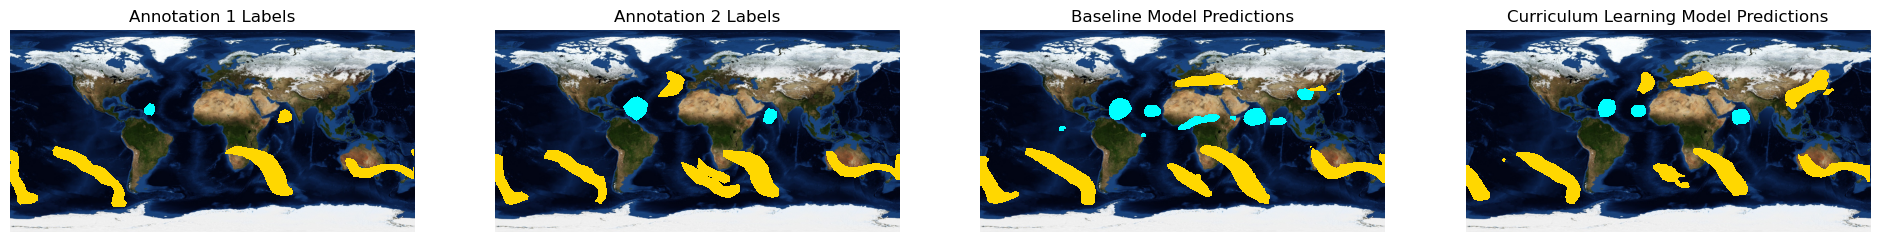

['data-2002-10-31-01-1_0.nc', 'data-2002-10-31-01-1_1.nc'] simpleSet
ious between annotation 1 and annotation 2:  [0.94200859 0.58552279 0.30721986]
ious between annotation 1 and baseline predictions:  [0.95319921 0.2602802  0.56575961]
ious between annotation 2 and baseline predictions:  [0.94018786 0.18802595 0.36516592]
ious between annotation 1 and curriculum predictions:  [0.94002793 0.27444391 0.42688988]
ious between annotation 2 and curriculum predictions:  [0.94041035 0.18198643 0.33944901]
ious between baseline predictions and curriculum predictions: [0.96136857 0.40542245 0.61159237]
(array([0, 1, 2]), array([824851,   3107,  56778]))
(array([0, 1, 2]), array([847399,   2807,  34530]))


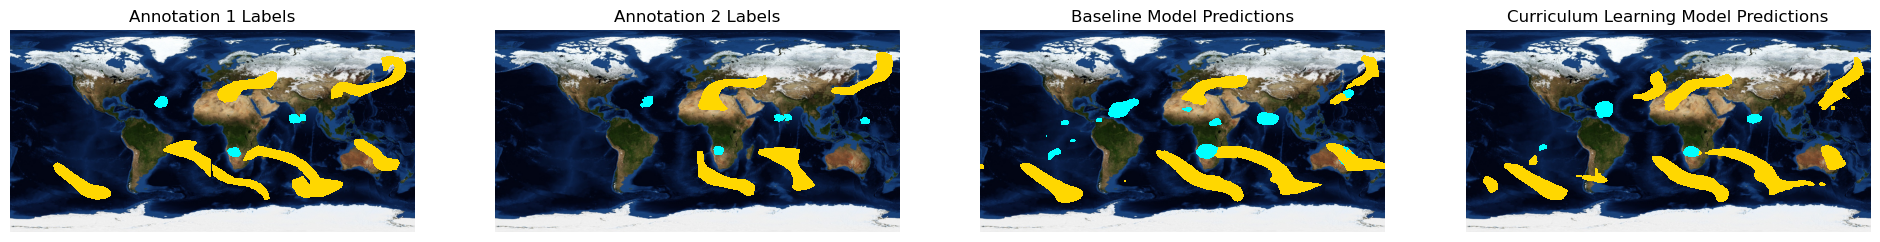

['data-1996-09-01-01-1_0.nc', 'data-1996-09-01-01-1_1.nc'] mediumSet
ious between annotation 1 and annotation 2:  [0.96198875 0.         0.51791154]
ious between annotation 1 and baseline predictions:  [0.9453172  0.         0.49006679]
ious between annotation 2 and baseline predictions:  [0.95486623 0.45110129 0.51113408]
ious between annotation 1 and curriculum predictions:  [0.95665447 0.         0.43596415]
ious between annotation 2 and curriculum predictions:  [0.95614306 0.41294528 0.39776967]
ious between baseline predictions and curriculum predictions: [0.96458026 0.48124735 0.5727271 ]
(array([0, 2]), array([859458,  25278]))
(array([0, 1, 2]), array([840360,  15841,  28535]))


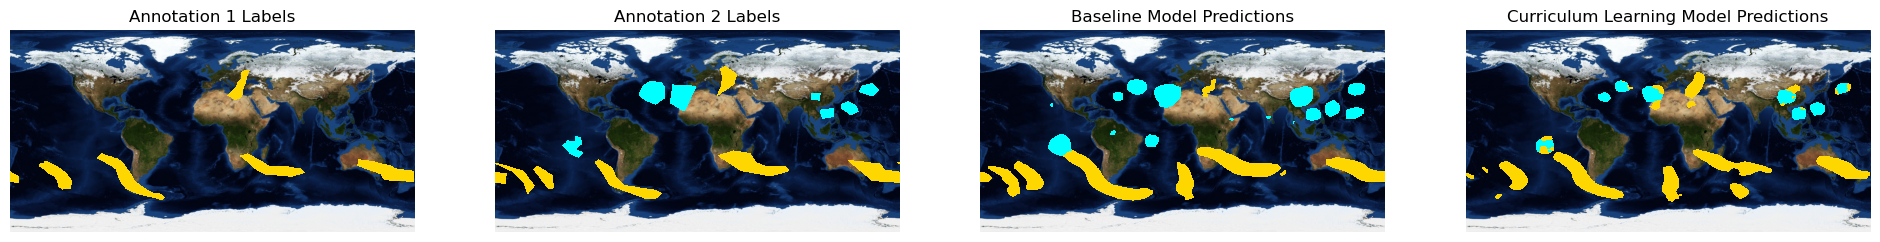

['data-2010-10-19-01-1_0.nc', 'data-2010-10-19-01-1_1.nc'] mediumSet
ious between annotation 1 and annotation 2:  [0.90789858 0.41353887 0.19777442]
ious between annotation 1 and baseline predictions:  [0.93599291 0.30756057 0.55280975]
ious between annotation 2 and baseline predictions:  [0.9283322  0.48186164 0.23917702]
ious between annotation 1 and curriculum predictions:  [0.92602551 0.2836007  0.40116376]
ious between annotation 2 and curriculum predictions:  [0.93169824 0.48612539 0.16965351]
ious between baseline predictions and curriculum predictions: [0.9545584  0.5849359  0.53895333]
(array([0, 1, 2]), array([794044,   7150,  83542]))
(array([0, 1, 2]), array([851198,   7613,  25925]))


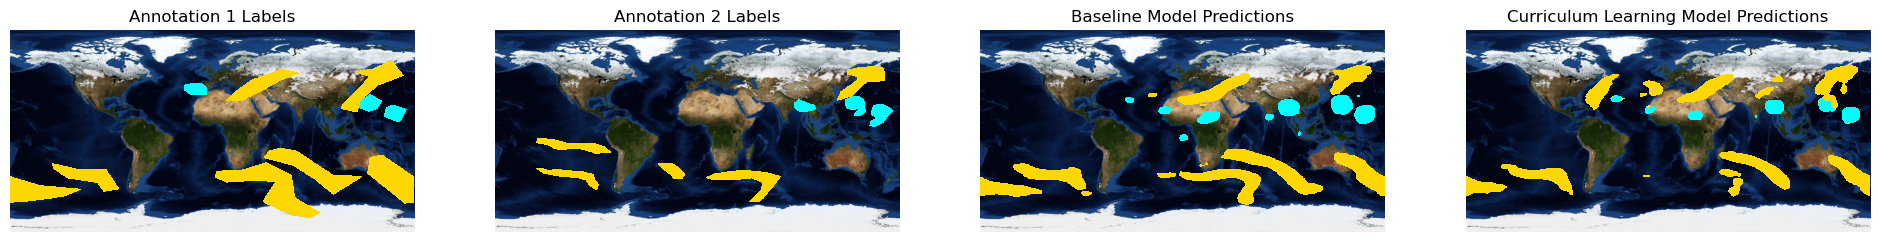

['data-2002-12-01-01-1_0.nc', 'data-2002-12-01-01-1_1.nc'] hardSet
ious between annotation 1 and annotation 2:  [0.96079576 0.         0.42329225]
ious between annotation 1 and baseline predictions:  [0.94562193 0.         0.52337891]
ious between annotation 2 and baseline predictions:  [0.94314295 0.04357382 0.45948076]
ious between annotation 1 and curriculum predictions:  [0.94944186 0.         0.47412472]
ious between annotation 2 and curriculum predictions:  [0.94623643 0.09270177 0.39940217]
ious between baseline predictions and curriculum predictions: [0.95567419 0.46472436 0.60474654]
(array([0, 2]), array([838767,  45969]))
(array([0, 1, 2]), array([848135,    456,  36145]))


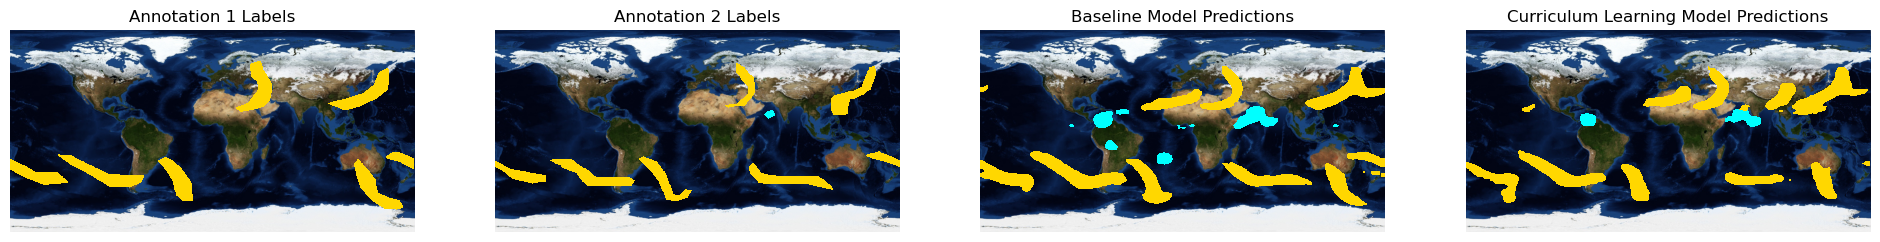

['data-2013-08-20-01-1_0.nc', 'data-2013-08-20-01-1_0.nc'] hardSet
ious between annotation 1 and annotation 2:  [1. 1. 1.]
ious between annotation 1 and baseline predictions:  [0.93844224 0.         0.38636563]
ious between annotation 2 and baseline predictions:  [0.93844224 0.         0.38636563]
ious between annotation 1 and curriculum predictions:  [0.941694   0.         0.40094843]
ious between annotation 2 and curriculum predictions:  [0.941694   0.         0.40094843]
ious between baseline predictions and curriculum predictions: [0.96819185 0.24768905 0.69506442]
(array([0, 2]), array([838905,  45831]))
(array([0, 2]), array([838905,  45831]))


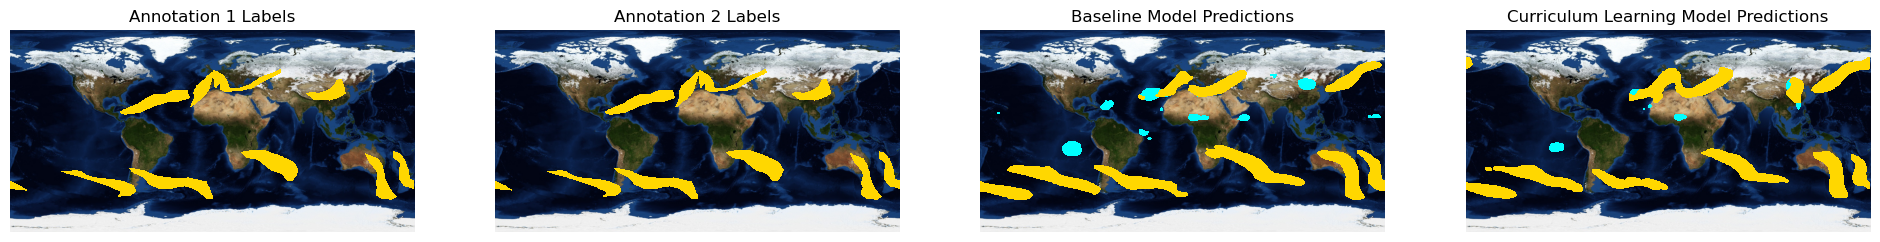

In [11]:
file_namess = [
    ['data-1998-08-01-01-1_0.nc', 'data-1998-08-01-01-1_1.nc'],
    ['data-2002-10-31-01-1_0.nc', 'data-2002-10-31-01-1_1.nc'],
    ['data-1996-09-01-01-1_0.nc', 'data-1996-09-01-01-1_1.nc'],
    ['data-2010-10-19-01-1_0.nc', 'data-2010-10-19-01-1_1.nc'],
    ['data-2002-12-01-01-1_0.nc', 'data-2002-12-01-01-1_1.nc'],
    ['data-2013-08-20-01-1_0.nc', 'data-2013-08-20-01-1_0.nc']
]
folders = [
    'simpleSet',
    'simpleSet',
    'mediumSet',
    'mediumSet',
    'hardSet',
    'hardSet'
]

for file_names, folder in zip(file_namess, folders):
    print(file_names, folder)
    plot_4_images(file_names, folder)

data-1996-06-09-01-1_0.nc testSet
ious between labels and baseline predictions:  [0.93423126 0.31786422 0.38726399]
ious between labels and curriculum predictions:  [0.93054868 0.13255766 0.35181597]
ious between baseline predictions and curriculum predictions: [0.9539168  0.17085038 0.50884362]


/tmp/ipykernel_63053/85692255.py:68: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(
/tmp/ipykernel_63053/85692255.py:81: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(
/tmp/ipykernel_63053/85692255.py:94: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or

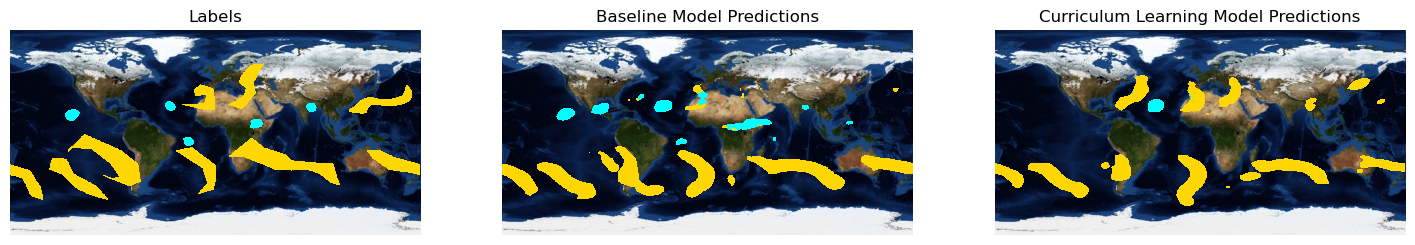

data-2000-02-19-01-1_0.nc testSet
ious between labels and baseline predictions:  [0.94249498 0.32520059 0.35278712]
ious between labels and curriculum predictions:  [0.94388898 0.08275405 0.32165203]
ious between baseline predictions and curriculum predictions: [0.94494213 0.04929022 0.47249828]


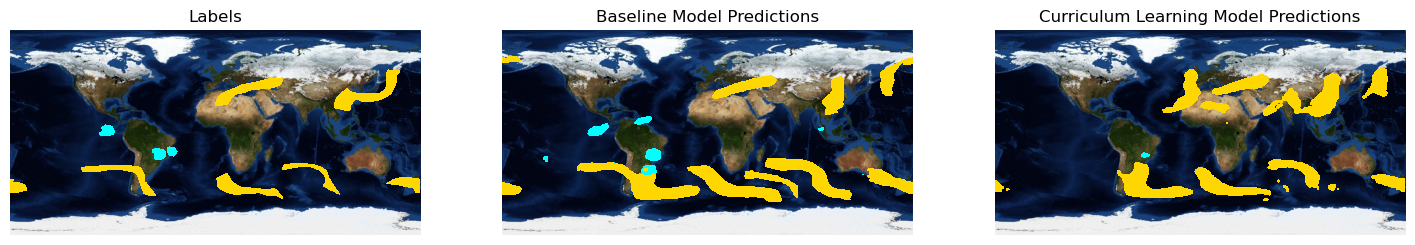

data-2007-07-27-01-1_0.nc testSet
ious between labels and baseline predictions:  [0.9362026  0.12153062 0.40817747]
ious between labels and curriculum predictions:  [0.94276545 0.43464295 0.41748302]
ious between baseline predictions and curriculum predictions: [0.96736454 0.24387941 0.6530385 ]


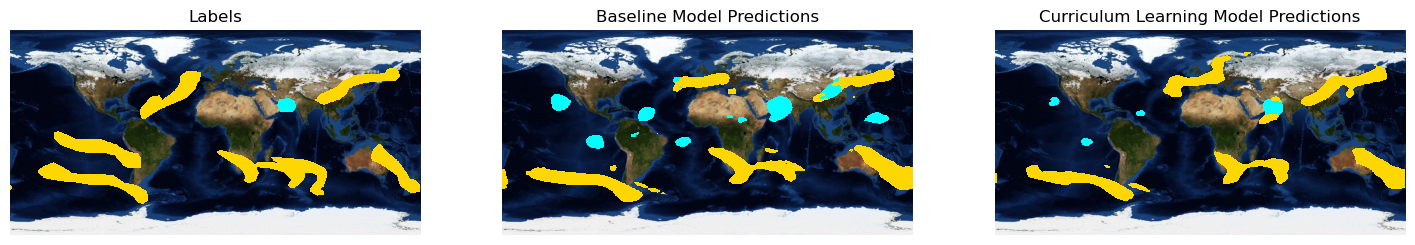

data-2013-09-27-01-1_0.nc testSet
ious between labels and baseline predictions:  [0.94435223 0.41032234 0.46763579]
ious between labels and curriculum predictions:  [0.95447283 0.44922547 0.48803645]
ious between baseline predictions and curriculum predictions: [0.95507152 0.42715055 0.54183003]


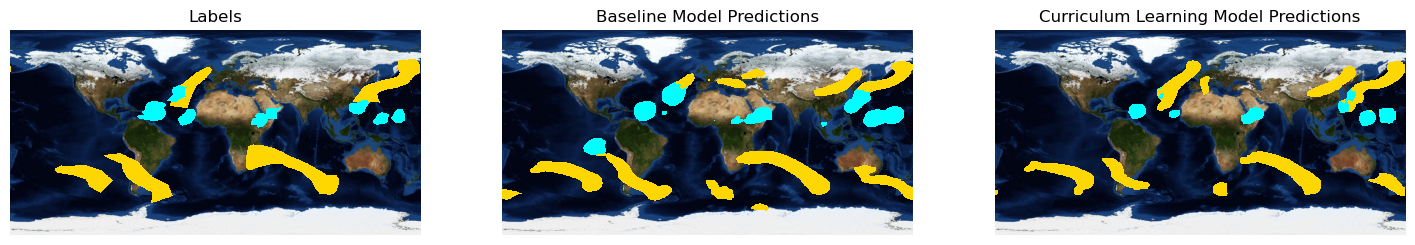

In [12]:
file_names = [
    'data-1996-06-09-01-1_0.nc',
    'data-2000-02-19-01-1_0.nc',
    'data-2007-07-27-01-1_0.nc',
    'data-2013-09-27-01-1_0.nc'
]
folders = [
    'testSet',
    'testSet',
    'testSet',
    'testSet'
]

for file_name, folder in zip(file_names, folders):
    print(file_name, folder)
    plot_3_images(file_name, folder)